In [1]:
from Pinns_Class import *
import matplotlib.pyplot as plt

Running on  cpu


### Cos_1D

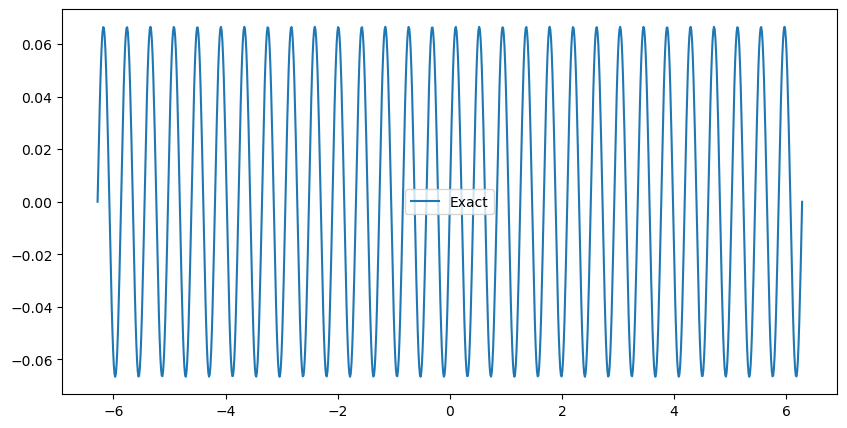

In [2]:
w = 15
n_hidden_layers = 2
neurons = 16
activation_function = nn.Tanh()

# Create the model
model = Cos_1D(w, n_hidden_layers, neurons, activation_function)

# Test the exact solution
x_test = torch.linspace(-2*torch.pi, 2*torch.pi, 1000, dtype=torch.float32, device=DEVICE, requires_grad=True).reshape(-1, 1)   # the input has to be of shape (n, 1)
u_exact = model.exact_solution(x_test)

fig = plt.figure(figsize=(10, 5))
plt.plot(x_test.cpu().detach().numpy(), u_exact.cpu().detach().numpy(), label='Exact')
plt.legend()

In [3]:
num_points = 200
n_epochs = 10000
optimizer_ADAM = optim.Adam(model.parameters(),
                            lr=float(0.001))
history = model.fit(num_points, optimizer_ADAM, n_epochs, verbose=False)

Epoch :  0 	 Loss:  0.5025542974472046 	 Epoch_time:  0  s
Epoch :  1 	 Loss:  0.50202876329422 	 Epoch_time:  0  s
Epoch :  2 	 Loss:  0.5015138983726501 	 Epoch_time:  0  s
Epoch :  3 	 Loss:  0.5010082125663757 	 Epoch_time:  0  s
Epoch :  4 	 Loss:  0.5005101561546326 	 Epoch_time:  0  s
Epoch :  5 	 Loss:  0.5000181198120117 	 Epoch_time:  0  s
Epoch :  6 	 Loss:  0.49952995777130127 	 Epoch_time:  0  s
Epoch :  7 	 Loss:  0.4990442395210266 	 Epoch_time:  0  s
Epoch :  8 	 Loss:  0.4985600709915161 	 Epoch_time:  0  s
Epoch :  9 	 Loss:  0.4980770945549011 	 Epoch_time:  0  s
Epoch :  10 	 Loss:  0.49759548902511597 	 Epoch_time:  0  s
Epoch :  11 	 Loss:  0.4971155822277069 	 Epoch_time:  0  s
Epoch :  12 	 Loss:  0.49663788080215454 	 Epoch_time:  0  s
Epoch :  13 	 Loss:  0.4961629807949066 	 Epoch_time:  0  s
Epoch :  14 	 Loss:  0.4956913888454437 	 Epoch_time:  0  s
Epoch :  15 	 Loss:  0.4952237010002136 	 Epoch_time:  0  s
Epoch :  16 	 Loss:  0.4947606027126312 	 Epoch_t

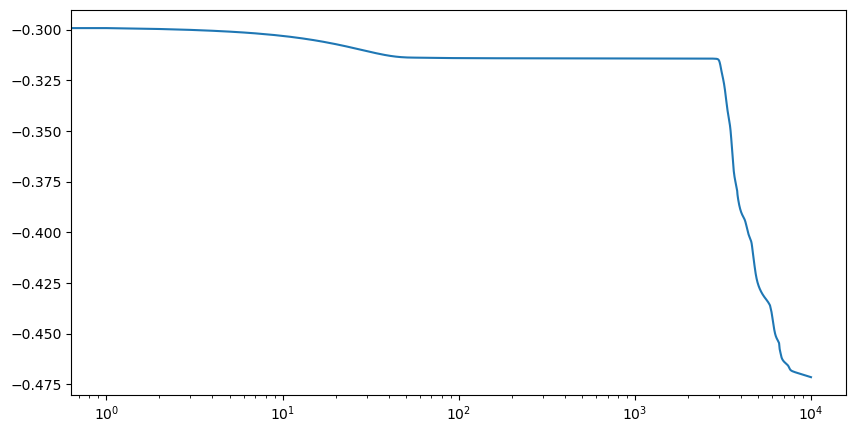

In [4]:
fig = plt.figure(figsize=(10, 5))
plt.plot(range(n_epochs),np.log10(history), label='Loss')
# set log scale
plt.xscale('log')

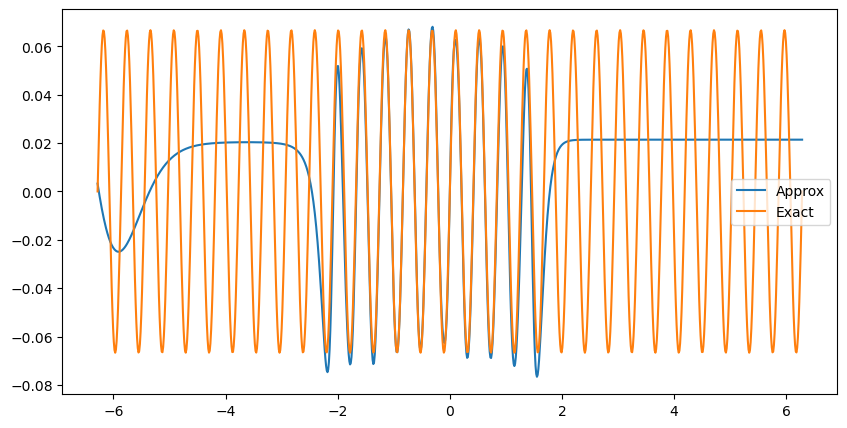

In [5]:
model.eval()
# u_approx = model(x_test)
u_exact = model.exact_solution(x_test)
# Approximate the solution with the NN building the ansatz
# u_approx = torch.tanh(model.w * model.normalize_input(x_test)) * model.unnormalize_output( model( model.normalize_input( x_test)) )
u_approx = torch.tanh(model.w * x_test) * model.unnormalize_output( model( model.normalize_input( x_test)) )


fig = plt.figure(figsize=(10, 5))
plt.plot(x_test.cpu().detach().numpy(), u_approx.cpu().detach().numpy(), label='Approx')
plt.plot(x_test.cpu().detach().numpy(), u_exact.cpu().detach().numpy(), label='Exact')
plt.legend()

### Cos_muldi1D

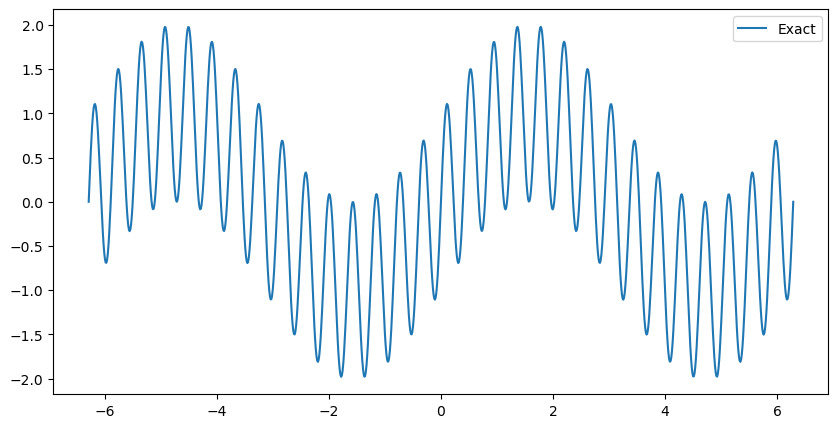

In [3]:
n_multi_scale = 2
w_list = [1, 15]
n_hidden_layers = 3
neurons = 20
activation_function = nn.Tanh()

# Create the model
model = PINN(n_multi_scale, w_list, n_hidden_layers, neurons, activation_function)

# Test the exact solution
x_test = torch.linspace(-2*torch.pi, 2*torch.pi, 1000, dtype=torch.float32, device=DEVICE)
u_exact = model.exact_solution(x_test)

fig = plt.figure(figsize=(10, 5))
plt.plot(x_test.cpu().numpy(), u_exact.cpu().numpy(), label='Exact')
plt.legend()

In [4]:
n_multi_scale = 1
w_list = [5]
n_hidden_layers = 3
neurons = 20
activation_function = nn.Tanh()

# Create the model
model = PINN(n_multi_scale, w_list, n_hidden_layers, neurons, activation_function)

# Test the exact solution
x_test = torch.linspace(-2*torch.pi, 2*torch.pi, 1000, dtype=torch.float32, device=DEVICE)
x_norm = model.normalize(x_test)
u_exact = model.exact_solution(x_test)
u_sol = torch.sin(x_test*w_list[0])

fig = plt.figure(figsize=(10, 5))
plt.plot(x_norm.cpu().numpy(), u_exact.cpu().numpy(), label='Exact')
plt.plot(x_norm.cpu().numpy(), u_sol.cpu().numpy(), label='Solution')
plt.legend()

AttributeError: 'PINN' object has no attribute 'normalize'

In [ ]:
torch.tanh(torch.tensor([1]))

tensor([0.7616])

In [ ]:
x_test = torch.linspace(-2*torch.pi, 2*torch.pi, 8, dtype=torch.float32, device=DEVICE)
print(x_test)

x_norm = model.normalize(x_test)
print(x_norm)

x_norm2 = model.normalize(x_norm)
print(x_norm2)

tensor([-6.2832, -4.4880, -2.6928, -0.8976,  0.8976,  2.6928,  4.4880,  6.2832])
tensor([-1.0000, -0.7143, -0.4286, -0.1429,  0.1429,  0.4286,  0.7143,  1.0000])
tensor([-1.0000, -0.7143, -0.4286, -0.1429,  0.1429,  0.4286,  0.7143,  1.0000])
